In [28]:
import pandas as pd
import re
from sec_edgar_downloader import Downloader
import os
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize


In [2]:

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

dl = Downloader("MyCompanyName", "my.email@domain.com",
                "/Users/abishek/Documents/fintech_research/EDGAR-10k-analysis")
dl.get("10-K", "GOOGL", after="1995-01-01",
       before="2024-01-01", download_details="JSON")
dl.get("10-K", "NVDA", after="1995-01-01",
       before="2024-01-01", download_details="JSON")


def get_directories(path, tik):
    directory_names = []
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            directory_names.append(
                "./sec-edgar-filings/"+tik+"/10-K/" + item + "/primary-document.html")
    return directory_names


googl_path = "/Users/abishek/Documents/fintech_research/EDGAR-10k-analysis/sec-edgar-filings/GOOGL/10-K"
googl_htmls = get_directories(googl_path, "GOOGL")

nvda_path = "/Users/abishek/Documents/fintech_research/EDGAR-10k-analysis/sec-edgar-filings/NVDA/10-K"
nvda_htmls = get_directories(nvda_path, "NVDA")

In [33]:
count = 0
for filename in googl_htmls:
    with open(filename, "r", encoding="latin-1") as f:
        html_content = f.read()
        nvda_htmls = googl_htmls
        soup = BeautifulSoup(html_content, "html.parser")

        # Search for the heading in both  and  tags
        md_a_start = soup.find(
            "font", string="MANAGEMENT’S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS")
        if not md_a_start:
            md_a_start = soup.find(
                "span", string="MANAGEMENT’S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS")

        if md_a_start:
            md_a_container = md_a_start.find_parent("div")

            if md_a_container:
                # Extract text from div elements with specific indentation style
                md_a_text = ""
                # Adjust indentation style as needed
                for element in md_a_container.find_all("div", style=lambda x: x and 'text-indent:22.5pt' in x):
                    text = element.get_text(separator="\n\n")

                    # Text Cleaning
                    # Remove Unwanted Characters
                    text = re.sub(r"[^a-zA-Z0-9\s\.\,\?\!]+", "", text)

                    # 2. Normalize Whitespace
                    # Replace multiple spaces with single spaces
                    text = " ".join(text.split())

                    # Handle Punctuation (Keep only periods, commas, question marks, and exclamation points)
                    text = re.sub(r"[^\w\s\.\,\?\!]+", "", text)

                    # Lowercase Conversion
                    text = text.lower()

                    #  Lemmatization
                    text = " ".join([lemmatizer.lemmatize(word)
                                    for word in text.split()])

                    # 6. Tokenization
                    # tokens = word_tokenize(text)
                count += 1

                md_a_text += text + "\n\n"

        else:
            print("files that cannot find the header")
            print(filename)
    google_text = md_a_text


In [34]:
for filename in nvda_htmls:
    with open(filename, "r", encoding="latin-1") as f:
        html_content = f.read()
        soup = BeautifulSoup(html_content, "html.parser")

        # Search for the heading in both  and  tags
        md_a_start = soup.find(
            "font", string="MANAGEMENT’S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS")
        if not md_a_start:
            md_a_start = soup.find(
                "span", string="MANAGEMENT’S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS")

        if md_a_start:
            md_a_container = md_a_start.find_parent("div")

            if md_a_container:
                # Extract text from div elements with specific indentation style
                md_a_text = ""
                # Adjust indentation style as needed
                for element in md_a_container.find_all("div", style=lambda x: x and 'text-indent:22.5pt' in x):
                    text = element.get_text(separator="\n\n")

                    # Text Cleaning
                    # Remove Unwanted Characters
                    text = re.sub(r"[^a-zA-Z0-9\s\.\,\?\!]+", "", text)

                    # 2. Normalize Whitespace
                    # Replace multiple spaces with single spaces
                    text = " ".join(text.split())

                    # Handle Punctuation (Keep only periods, commas, question marks, and exclamation points)
                    text = re.sub(r"[^\w\s\.\,\?\!]+", "", text)

                    # Lowercase Conversion
                    text = text.lower()

                    #  Lemmatization
                    text = " ".join([lemmatizer.lemmatize(word)
                                    for word in text.split()])

                    # 6. Tokenization
                    # tokens = word_tokenize(text)


                md_a_text += text + "\n\n"

        else:
            print("files that cannot find the header")
            print(filename)
    nvidia_text = md_a_text


In [20]:

# Extract data from the text excerpt
year = 2015  # Extract year from the context or image
revenue = 75.0
google_segment_revenue = 74.5
other_bets_revenue = 0.4
us_revenue = 34.8
emea_revenue = 7.1
apac_revenue = 33.1
cost_of_revenue = 28.2
traffic_acquisition_costs = 14.4
operating_expenses = 27.5
income_from_operations = 19.4
effective_tax_rate = 17
net_income = 16.3
operating_cash_flow = 26.0
capital_expenditures = 9.9
headcount = 61814

# Create a dictionary with extracted data
data = {
    'year': year,
    'revenue': revenue,
    'google_segment_revenue': google_segment_revenue,
    'other_bets_revenue': other_bets_revenue,
    'us_revenue': us_revenue,
    'emea_revenue': emea_revenue,
    'apac_revenue': apac_revenue,
    'cost_of_revenue': cost_of_revenue,
    'traffic_acquisition_costs': traffic_acquisition_costs,
    'operating_expenses': operating_expenses,
    'income_from_operations': income_from_operations,
    'effective_tax_rate': effective_tax_rate,
    'net_income': net_income,
    'operating_cash_flow': operating_cash_flow,
    'capital_expenditures': capital_expenditures,
    'headcount': headcount
}

# Create a Pandas DataFrame
df = pd.DataFrame([data])

# Extract data for 2016
year = 2016
revenue = 90.3
google_segment_revenue = 89.5
other_bets_revenue = 0.8
us_revenue = 42.8
emea_revenue = 7.8
apac_revenue = 39.7
cost_of_revenue = 35.1
traffic_acquisition_costs = 16.8
operating_expenses = 31.4
income_from_operations = 23.7
effective_tax_rate = 19
net_income = 19.5
operating_cash_flow = 36.0
capital_expenditures = 10.2
headcount = 72053

# Create a dictionary for 2016 data
data_2016 = {
    'year': year,
    'revenue': revenue,
    'google_segment_revenue': google_segment_revenue,
    'other_bets_revenue': other_bets_revenue,
    'us_revenue': us_revenue,
    'emea_revenue': emea_revenue,
    'apac_revenue': apac_revenue,
    'cost_of_revenue': cost_of_revenue,
    'traffic_acquisition_costs': traffic_acquisition_costs,
    'operating_expenses': operating_expenses,
    'income_from_operations': income_from_operations,
    'effective_tax_rate': effective_tax_rate,
    'net_income': net_income,
    'operating_cash_flow': operating_cash_flow,
    'capital_expenditures': capital_expenditures,
    'headcount': headcount
}


# Extract data for 2017
year = 2017
revenue = 110.9
google_segment_revenue = 109.7
other_bets_revenue = 1.2
us_revenue = 52.4
emea_revenue = 36.0  # Note: EMEA revenue instead of UK revenue
apac_revenue = 16.2
other_americas_revenue = 6.1
cost_of_revenue = 45.6
traffic_acquisition_costs = 21.7
operating_expenses = 39.1
income_from_operations = 26.1
effective_tax_rate = 53.3
net_income = 12.7
operating_cash_flow = 37.1
capital_expenditures = 13.2
headcount = 80110

# Create a dictionary for 2017 data
data_2017 = {
    'year': year,
    'revenue': revenue,
    'google_segment_revenue': google_segment_revenue,
    'other_bets_revenue': other_bets_revenue,
    'us_revenue': us_revenue,
    'emea_revenue': emea_revenue,  # Note the change in column name
    'apac_revenue': apac_revenue,
    'other_americas_revenue': other_americas_revenue,
    'cost_of_revenue': cost_of_revenue,
    'traffic_acquisition_costs': traffic_acquisition_costs,
    'operating_expenses': operating_expenses,
    'income_from_operations': income_from_operations,
    'effective_tax_rate': effective_tax_rate,
    'net_income': net_income,
    'operating_cash_flow': operating_cash_flow,
    'capital_expenditures': capital_expenditures,
    'headcount': headcount
}


# Extract data for 2018
year = 2018
revenue = 136.8
google_segment_revenue = 136.2
other_bets_revenue = 0.595
us_revenue = 66.3
emea_revenue = 44.6
apac_revenue = 21.4
other_americas_revenue = 7.6
cost_of_revenue = 59.5
traffic_acquisition_costs = 26.7
operating_expenses = 50.9
income_from_operations = 26.3
other_income_expense_net = -8.6
effective_tax_rate = 12
net_income = 30.7
operating_cash_flow = 48.0
capital_expenditures = 25.1
headcount = 98771

# Create a dictionary for 2018 data
data_2018 = {
    'year': year,
    'revenue': revenue,
    'google_segment_revenue': google_segment_revenue,
    'other_bets_revenue': other_bets_revenue,
    'us_revenue': us_revenue,
    'emea_revenue': emea_revenue,
    'apac_revenue': apac_revenue,
    'other_americas_revenue': other_americas_revenue,
    'cost_of_revenue': cost_of_revenue,
    'traffic_acquisition_costs': traffic_acquisition_costs,
    'operating_expenses': operating_expenses,
    'income_from_operations': income_from_operations,
    'other_income_expense_net': other_income_expense_net,  # New column
    'effective_tax_rate': effective_tax_rate,
    'net_income': net_income,
    'operating_cash_flow': operating_cash_flow,
    'capital_expenditures': capital_expenditures,
    'headcount': headcount
}


# Extract data for 2019
year = 2019
revenue = 161.9
google_segment_revenue = 160.7
other_bets_revenue = 0.659
us_revenue = 74.8
emea_revenue = 50.6
apac_revenue = 26.9
other_americas_revenue = 9.0
cost_of_revenue = 71.9
traffic_acquisition_costs = 30.1
operating_expenses = 55.7
income_from_operations = 34.2
other_income_expense_net = 5.4
effective_tax_rate = 13
net_income = 34.3
operating_cash_flow = 55.5
capital_expenditures = 23.5
headcount = 118899

# Create a dictionary for 2019 data
data_2019 = {
    'year': year,
    'revenue': revenue,
    'google_segment_revenue': google_segment_revenue,
    'other_bets_revenue': other_bets_revenue,
    'us_revenue': us_revenue,
    'emea_revenue': emea_revenue,
    'apac_revenue': apac_revenue,
    'other_americas_revenue': other_americas_revenue,
    'cost_of_revenue': cost_of_revenue,
    'traffic_acquisition_costs': traffic_acquisition_costs,
    'operating_expenses': operating_expenses,
    'income_from_operations': income_from_operations,
    'other_income_expense_net': other_income_expense_net,
    'effective_tax_rate': effective_tax_rate,
    'net_income': net_income,
    'operating_cash_flow': operating_cash_flow,
    'capital_expenditures': capital_expenditures,
    'headcount': headcount
}


# Extract data for 2020
year = 2020
total_revenue = 182.527
google_segment_revenue = 182  # Assuming this is in billions
other_bets_revenue = 0.657  # Assuming this is in billions
us_revenue = 85014
emea_revenue = 55370
apac_revenue = 32550
other_americas_revenue = 10381
cost_of_revenue = 84.7
traffic_acquisition_costs = None  # Still missing
operating_expenses = 56.6
income_from_operations = 41.2
other_income_expense_net = 6.8
effective_tax_rate = 16.2
net_income = 40269
operating_cash_flow = 65.1
capital_expenditures = 22.3
headcount = 135301

# Create a dictionary for 2020 data
data_2020 = {
    'year': year,
    'revenue': total_revenue,
    'google_segment_revenue': google_segment_revenue,
    'other_bets_revenue': other_bets_revenue,
    'us_revenue': us_revenue/1000,
    'emea_revenue': emea_revenue/1000,
    'apac_revenue': apac_revenue/1000,
    'other_americas_revenue': other_americas_revenue,
    'cost_of_revenue': cost_of_revenue,
    'traffic_acquisition_costs': traffic_acquisition_costs,
    'operating_expenses': operating_expenses,
    'income_from_operations': income_from_operations,
    'other_income_expense_net': other_income_expense_net,
    'effective_tax_rate': effective_tax_rate,
    'net_income': net_income/1000,
    'operating_cash_flow': operating_cash_flow,
    'capital_expenditures': capital_expenditures,
    'headcount': headcount
}


year = 2021
revenue = 257637
google_segment_revenue = 237529
other_bets_revenue = 793
us_revenue = 117894
emea_revenue = 79521
apac_revenue = 46123
other_americas_revenue = 14404
cost_of_revenue = 110589
traffic_acquisition_costs = 45586
operating_expenses = 56.6  # Assuming this is in billions to match previous format
income_from_operations = 78714
effective_tax_rate = 16.2
net_income = 76033
operating_cash_flow = 91652
capital_expenditures = 32770
headcount = 156500

# Create a dictionary for 2021 data (only relevant columns)
data_2021 = {
    'year': year,
    'revenue': revenue/1000,
    'google_segment_revenue': google_segment_revenue/1000,
    'other_bets_revenue': other_bets_revenue/1000,
    'us_revenue': us_revenue/1000,
    'emea_revenue': emea_revenue/1000,
    'apac_revenue': apac_revenue/1000,
    'other_americas_revenue': other_americas_revenue,
    'cost_of_revenue': cost_of_revenue/1000,
    'traffic_acquisition_costs': traffic_acquisition_costs/1000,
    'operating_expenses': operating_expenses,
    'income_from_operations': income_from_operations/1000,
    'effective_tax_rate': effective_tax_rate,
    'net_income': net_income/1000,
    'operating_cash_flow': operating_cash_flow/1000,
    'capital_expenditures': capital_expenditures/1000,
    'headcount': headcount
}
year = 2022

revenue = 282836
operating_income = 74842
net_income = 59972
headcount = 190234
google_segment_revenue = 253530
other_bets_revenue = 1068
cost_of_revenue = 128203
traffic_acquisition_costs = 49955
operating_expenses = 39950 + 29567 + 15724
other_income_expense_net = -3534
effective_tax_rate = 15.56
operating_cash_flow = 91695
capital_expenditures = 39184
us_revenue = revenue - 82062 - 47024 - 16976

# Combine all extracted 2022 data into a single dictionary
data_2022 = {
    'year': year,
    'revenue': revenue/1000,
    'google_segment_revenue': google_segment_revenue/1000,
    'other_bets_revenue': other_bets_revenue/1000,
    'us_revenue': us_revenue/1000,
    'emea_revenue': 82.062,
    'apac_revenue': 47.024,
    'cost_of_revenue': cost_of_revenue/1000,
    'traffic_acquisition_costs': traffic_acquisition_costs/1000,
    'operating_expenses': operating_expenses/1000,
    'income_from_operations': operating_income/1000,
    'effective_tax_rate': effective_tax_rate,
    'net_income': net_income/1000,
    'operating_cash_flow': operating_cash_flow/1000,
    'capital_expenditures': capital_expenditures/1000,
    'headcount': headcount
}

desired_columns = [
    'year', 'revenue', 'google_segment_revenue', 'other_bets_revenue', 'us_revenue',
    'emea_revenue', 'apac_revenue', 'cost_of_revenue', 'traffic_acquisition_costs',
    'operating_expenses', 'income_from_operations', 'effective_tax_rate',
    'net_income', 'operating_cash_flow', 'capital_expenditures', 'headcount'
]

# Function to trim a data dictionary to desired columns


def trim_data(data_dict):
    return {key: data_dict[key] for key in desired_columns}


# Trim data dictionaries for each year
data_2015 = trim_data(data)  # Assuming you already have data_2015
data_2016 = trim_data(data_2016)
data_2017 = trim_data(data_2017)
data_2018 = trim_data(data_2018)
data_2019 = trim_data(data_2019)
data_2020 = trim_data(data_2020)
data_2021 = trim_data(data_2021)
data_2022 = trim_data(data_2022)


# Recreate DataFrames with trimmed data
df_2015 = pd.DataFrame([data_2015])
df_2016 = pd.DataFrame([data_2016])
df_2017 = pd.DataFrame([data_2017])
df_2018 = pd.DataFrame([data_2018])
df_2019 = pd.DataFrame([data_2019])
df_2020 = pd.DataFrame([data_2020])
df_2021 = pd.DataFrame([data_2021])
df_2022 = pd.DataFrame([data_2022])

# Concatenate DataFrames
df = pd.concat([
    df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022
], ignore_index=True)

# Print the final DataFrame
google_df = df
print(df.to_string())


   year  revenue  google_segment_revenue  other_bets_revenue  us_revenue  emea_revenue  apac_revenue  cost_of_revenue  traffic_acquisition_costs  operating_expenses  income_from_operations  effective_tax_rate  net_income  operating_cash_flow  capital_expenditures  headcount
0  2015   75.000                  74.500               0.400      34.800         7.100        33.100           28.200                     14.400              27.500                  19.400               17.00      16.300               26.000                 9.900      61814
1  2016   90.300                  89.500               0.800      42.800         7.800        39.700           35.100                     16.800              31.400                  23.700               19.00      19.500               36.000                10.200      72053
2  2017  110.900                 109.700               1.200      52.400        36.000        16.200           45.600                     21.700              39.100           

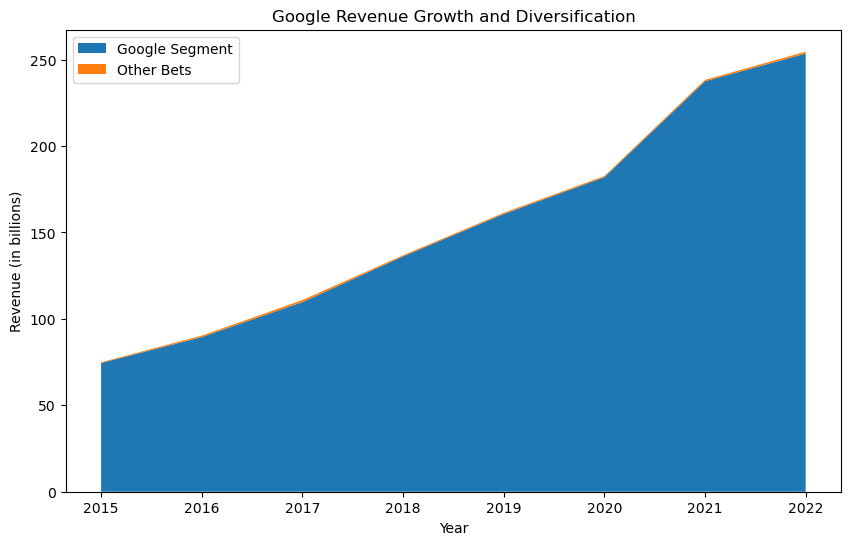

In [9]:
import matplotlib.pyplot as plt

# Prepare data for stacked area chart
revenue_by_year = df.pivot_table(index='year', values=['google_segment_revenue', 'other_bets_revenue'], aggfunc='sum')

# Create the stacked area chart
plt.figure(figsize=(10, 6))
plt.stackplot(revenue_by_year.index, revenue_by_year.values.T, labels=['Google Segment', 'Other Bets'])
plt.xlabel("Year")
plt.ylabel("Revenue (in billions)")
plt.title("Google Revenue Growth and Diversification")
plt.legend(loc='upper left')
plt.show()

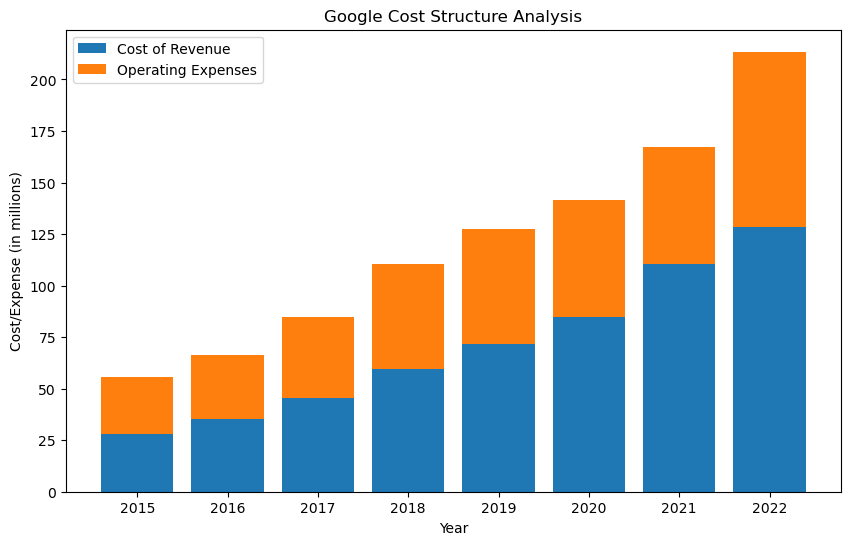

In [10]:
import matplotlib.pyplot as plt

# Prepare data for stacked bar chart
cost_by_year = df[['year', 'cost_of_revenue', 'operating_expenses']]

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(cost_by_year['year'], cost_by_year['cost_of_revenue'], label='Cost of Revenue')
plt.bar(cost_by_year['year'], cost_by_year['operating_expenses'], bottom=cost_by_year['cost_of_revenue'], label='Operating Expenses')
plt.xlabel("Year")
plt.ylabel("Cost/Expense (in millions)")
plt.title("Google Cost Structure Analysis")
plt.legend()
plt.show()

In [23]:
import pandas as pd

# List of desired columns
columns = [
    'year', 'total_revenue', 'cost_of_revenue', 'gross_profit',
    'research_and_development_expenses', 'sales_general_and_administrative_expenses',
    'operating_income_loss', 'net_income_loss'
]

# Data for each year (extracted from the image)
data = []
data.append({
    'year': 1997,
    'total_revenue': 27280,
    'cost_of_revenue': 29044,
    'gross_profit': -1764,
    'research_and_development_expenses': 7103,
    'sales_general_and_administrative_expenses': 4183,
    'operating_income_loss': -12859,
    'net_income_loss': -3399
})
data.append({
    'year': 1998,
    'total_revenue': 151413,
    'cost_of_revenue': 109237,
    'gross_profit': 42176,
    'research_and_development_expenses': 25073,
    'sales_general_and_administrative_expenses': 18902,
    'operating_income_loss': -1725,
    'net_income_loss': -3589 
})
data.append({
    'year': 1999, 
    'total_revenue': 374505,
    'cost_of_revenue': 232662,
    'gross_profit': 141843,
    'research_and_development_expenses': 46914,
    'sales_general_and_administrative_expenses': 36312, 
    'operating_income_loss': 58617,
    'net_income_loss': 40959
})
data.append({
    'year': 2000, 
    'total_revenue': 735264, 
    'cost_of_revenue': 462365,
    'gross_profit': 272899,
    'research_and_development_expenses': 86047,
    'sales_general_and_administrative_expenses': 58997,
    'operating_income_loss': 128135,
    'net_income_loss': 98439
})
data.append({
    'year': 2001, 
    'total_revenue': 1369471, 
    'cost_of_revenue': 850233, 
    'gross_profit': 519238,
    'research_and_development_expenses': 153920, 
    'sales_general_and_administrative_expenses': 97183,
    'operating_income_loss': 241732,
    'net_income_loss': 176924 
})
df = pd.DataFrame(data, columns=columns)

# Data for 2003 and 2004
data_2003 = {
    'year': 2003,
    'total_revenue': 1736986,
    'cost_of_revenue': 1458019,
    'gross_profit': 278967,
    'research_and_development_expenses': 150758,
    'sales_general_and_administrative_expenses': 90799,
    'operating_income_loss': 32410,
    'net_income_loss': 46379 
}

data_2004 = {
    'year': 2004, 
    'total_revenue': 1822945,
    'cost_of_revenue': 1464117,
    'gross_profit': 358828,
    'research_and_development_expenses': 192557,
    'sales_general_and_administrative_expenses': 86613,
    'operating_income_loss': 79755,
    'net_income_loss': 122254
}

# Create DataFrames for 2003 and 2004
df_2003 = pd.DataFrame([data_2003], columns=columns)
df_2004 = pd.DataFrame([data_2004], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2003, df_2004], ignore_index=True)

# Data for 2005
data_2005 = {
    'year': 2005,
    'total_revenue': 2010033,
    'cost_of_revenue': 1470677,
    'gross_profit': 539356, 
    'research_and_development_expenses': 143986,
    'sales_general_and_administrative_expenses': 125089, 
    'operating_income_loss': 100360,
    'net_income_loss': 166062 
}

# Create DataFrame for 2005
df_2005 = pd.DataFrame([data_2005], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2005], ignore_index=True)

# Data for 2006 
data_2006 = {
    'year': 2006,
    'total_revenue': 2375957,
    'cost_of_revenue': 935880,
    'gross_profit': 1440077,
    'research_and_development_expenses': 340097,
    'sales_general_and_administrative_expenses': 302221,
    'operating_income_loss': 575665, 
    'net_income_loss': 302586
} 

# Create DataFrame for 2006
df_2006 = pd.DataFrame([data_2006], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2006], ignore_index=True)
# Data for 2007
data_2007 = {
    'year': 2007,
    'total_revenue': 3068771,
    'cost_of_revenue': 1768322,  
    'gross_profit': 3068771 - 1768322,  
    'research_and_development_expenses': 453452,
    'sales_general_and_administrative_expenses': 448834,
    'operating_income_loss': 453452,
    'net_income_loss': 448834 
}

# Create DataFrame for 2007
df_2007 = pd.DataFrame([data_2007], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2007], ignore_index=True)

# Data for 2008
data_2008 = {
    'year': 2008,
    'total_revenue': 4097860,
    'cost_of_revenue': 2228580,  
    'gross_profit': 4097860 - 2228580,  
    'research_and_development_expenses': 836346,
    'sales_general_and_administrative_expenses': 77939,
    'operating_income_loss': 77939, 
    'net_income_loss': 550108
}

# Create DataFrame for 2008
df_2008 = pd.DataFrame([data_2008], columns=columns)

# Data for 2009
data_2009 = {
    'year': 2009,
    'total_revenue': 3424599,
    'cost_of_revenue': 2250590,  
    'gross_profit': 3424599 - 2250590,  
    'research_and_development_expenses': 710700,
    'sales_general_and_administrative_expenses': 380441,
    'operating_income_loss': -710700,
    'net_income_loss': -380441
}

# Create DataFrame for 2009
df_2009 = pd.DataFrame([data_2009], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2009], ignore_index=True)
# Data for 2010
data_2010 = {
    'year': 2010,
    'total_revenue': 3326445,
    'cost_of_revenue': 2149522,  
    'gross_profit': 3326445 - 2149522,  
    'research_and_development_expenses': 98895,
    'sales_general_and_administrative_expenses': 675987,
    'operating_income_loss': -98895,
    'net_income_loss': -675987 
}

# Create DataFrame for 2010
df_2010 = pd.DataFrame([data_2010], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2010], ignore_index=True)
# Data for 2011 
data_2011 = {
    'year': 2011,
    'total_revenue': 3543309, 
    'cost_of_revenue': 2134219,  
    'gross_profit': 3543309 - 2134219,  
    'research_and_development_expenses': 255747,
    'sales_general_and_administrative_expenses': 253146, 
    'operating_income_loss': 255747,
    'net_income_loss': 253146
}

# Create DataFrame for 2011
df_2011 = pd.DataFrame([data_2011], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2011], ignore_index=True)
# Data for 2012 
data_2012 = {
    'year': 2012,
    'total_revenue': 3997930,
    'cost_of_revenue': 1941413,  
    'gross_profit': 3997930 - 1941413,  
    'research_and_development_expenses': 648299,
    'sales_general_and_administrative_expenses': 581090, 
    'operating_income_loss': 648299,
    'net_income_loss': 581090
}

# Create DataFrame for 2012
df_2012 = pd.DataFrame([data_2012], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2012], ignore_index=True)

# Data for 2013
data_2013 = {
    'year': 2013, 
    'total_revenue': 4280159, 
    'cost_of_revenue': 2053816, 
    'gross_profit': 4280159 - 2053816,  
    'research_and_development_expenses': 662536,
    'sales_general_and_administrative_expenses': 529399,
    'operating_income_loss': 662536, 
    'net_income_loss': 529399
}

# Create DataFrame for 2013 
df_2013 = pd.DataFrame([data_2013], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2013], ignore_index=True)
# Data for 2014
data_2014 = {
    'year': 2014,
    'total_revenue': 4130162,
    'cost_of_revenue': 1862399,  
    'gross_profit': 4130162 - 1862399,  
    'research_and_development_expenses': 496227,
    'sales_general_and_administrative_expenses': 439990,
    'operating_income_loss': 496227,
    'net_income_loss': 439990 
}

# Create DataFrame for 2014
df_2014 = pd.DataFrame([data_2014], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2014], ignore_index=True)

# Data for 2015
data_2015 = {
    'year': 2015,
    'total_revenue': 4681507, 
    'cost_of_revenue': 2082030,  
    'gross_profit': 4681507 - 2082030,  
    'research_and_development_expenses': 758989,
    'sales_general_and_administrative_expenses': 630587, 
    'operating_income_loss': 758989, 
    'net_income_loss': 630587
}

# Create DataFrame for 2015
df_2015 = pd.DataFrame([data_2015], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2015], ignore_index=True)


# Data for 2016
data_2016 = {
    'year': 2016,
    'total_revenue': 5010000, 
    'cost_of_revenue': 2199000,  
    'gross_profit': 5010000 - 2199000,  
    'research_and_development_expenses': 747*1000, 
    'sales_general_and_administrative_expenses': 614*1000,
    'operating_income_loss': 747*1000,
    'net_income_loss': 614*1000
}

# Create DataFrame for 2016
df_2016 = pd.DataFrame([data_2016], columns=columns)

# Concatenate with the existing DataFrame 
df = pd.concat([df, df_2016], ignore_index=True)


# Data for 2017
data_2017 = {
    'year': 2017,
    'total_revenue': 6910000,  
    'cost_of_revenue': 2847000,  
    'gross_profit': 4063000,  
    'research_and_development_expenses': 1934*1000,
    'sales_general_and_administrative_expenses': 1666*1000,
    'operating_income_loss': 1934*1000,
    'net_income_loss': 1666 *1000
}

# Create DataFrame for 2017
df_2017 = pd.DataFrame([data_2017], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2017], ignore_index=True)



# Data for 2018
data_2018 = {
    'year': 2018,
    'total_revenue': 9714000,
    'cost_of_revenue': 3892000,  
    'gross_profit': 5822000,  
    'research_and_development_expenses': 3210*1000, 
    'sales_general_and_administrative_expenses': 3047*1000, 
    'operating_income_loss': 3210*1000,
    'net_income_loss': 3047*1000
}

# Create DataFrame for 2018
df_2018 = pd.DataFrame([data_2018], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2018], ignore_index=True)

# Data for 2019
data_2019 = {
    'year': 2019,
    'total_revenue': 11716000, 
    'cost_of_revenue': 4545000,  
    'gross_profit': 7171000,  
    'research_and_development_expenses': 3804*1000, 
    'sales_general_and_administrative_expenses': 4141*1000,
    'operating_income_loss': 3804*1000, 
    'net_income_loss': 4141*1000
}

# Create DataFrame for 2019
df_2019 = pd.DataFrame([data_2019], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2019], ignore_index=True)


# Data for 2020
data_2020 = {
    'year': 2020,
    'total_revenue': 10918000,
    'cost_of_revenue': 4150000,  
    'gross_profit': 6768000,  
    'research_and_development_expenses': 2846*1000,
    'sales_general_and_administrative_expenses': 2796*1000, 
    'operating_income_loss': 2846*1000, 
    'net_income_loss': 2796*1000
}

# Create DataFrame for 2020
df_2020 = pd.DataFrame([data_2020], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2020], ignore_index=True)

# Data for 2021
data_2021 = {
    'year': 2021,
    'total_revenue': 16675000,
    'cost_of_revenue': 6279000,
    'gross_profit': 10396000,  
    'research_and_development_expenses': 3024*1000,
    'sales_general_and_administrative_expenses': 1940*1000,
    'operating_income_loss': 4532*1000,
    'net_income_loss': 4332*1000
} 

# Create DataFrame for 2021
df_2021 = pd.DataFrame([data_2021], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2021], ignore_index=True)


# Data for 2022
data_2022 = {
    'year': 2022,
    'total_revenue': 26914000,
    'cost_of_revenue': 9459000,
    'gross_profit': 17455000,  
    'research_and_development_expenses': 5269*1000,
    'sales_general_and_administrative_expenses': 2166*1000,
    'operating_income_loss': 10041*1000,
    'net_income_loss': 9752*1000
}

# Create DataFrame for 2022
df_2022 = pd.DataFrame([data_2022], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2022], ignore_index=True)


# Data for 2023
data_2023 = {
    'year': 2023,
    'total_revenue': 26974000,
    'cost_of_revenue': 15355000,
    'gross_profit': 11619000,  
    'research_and_development_expenses': 7399*1000,
    'sales_general_and_administrative_expenses': 2440*1000,
    'operating_income_loss': 4294*1000, 
    'net_income_loss': 4368 *1000
}

# Create DataFrame for 2023
df_2023 = pd.DataFrame([data_2023], columns=columns)

# Concatenate with the existing DataFrame
df = pd.concat([df, df_2023], ignore_index=True)


# Print the updated DataFrame
print(df.to_string())



    year  total_revenue  cost_of_revenue  gross_profit  research_and_development_expenses  sales_general_and_administrative_expenses  operating_income_loss  net_income_loss
0   1997          27280            29044         -1764                               7103                                       4183                 -12859            -3399
1   1998         151413           109237         42176                              25073                                      18902                  -1725            -3589
2   1999         374505           232662        141843                              46914                                      36312                  58617            40959
3   2000         735264           462365        272899                              86047                                      58997                 128135            98439
4   2001        1369471           850233        519238                             153920                                      97183   

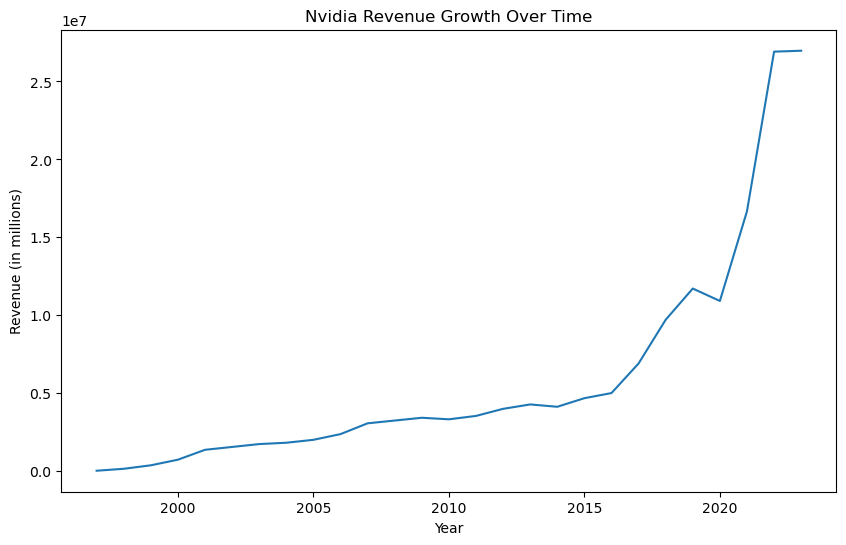

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['total_revenue'], label='Total Revenue')
plt.xlabel("Year")
plt.ylabel("Revenue (in millions)")
plt.title("Nvidia Revenue Growth Over Time")
plt.show()


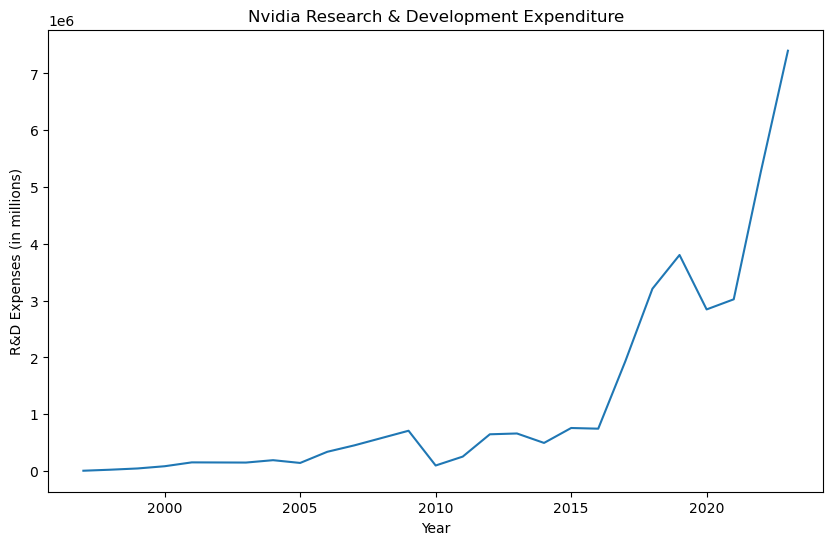

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['research_and_development_expenses'], label='R&D Expenses')
plt.xlabel("Year")
plt.ylabel("R&D Expenses (in millions)")
plt.title("Nvidia Research & Development Expenditure")
plt.show()

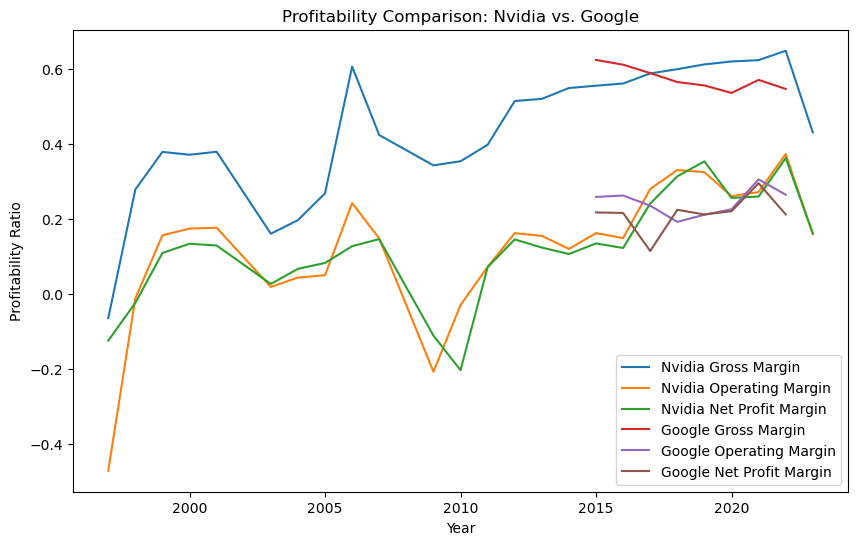

In [26]:
plt.figure(figsize=(10, 6))

# Nvidia Profitability Metrics
plt.plot(df['year'], df['gross_profit'] / df['total_revenue'], label='Nvidia Gross Margin')
plt.plot(df['year'], df['operating_income_loss'] / df['total_revenue'], label='Nvidia Operating Margin')
plt.plot(df['year'], df['net_income_loss'] / df['total_revenue'], label='Nvidia Net Profit Margin')

# Google Profitability Metrics (using correct column names)
plt.plot(google_df['year'], 
         (google_df['revenue'] - google_df['cost_of_revenue']) / google_df['revenue'], 
         label='Google Gross Margin')
plt.plot(google_df['year'], google_df['income_from_operations'] / google_df['revenue'], label='Google Operating Margin')
plt.plot(google_df['year'], google_df['net_income'] / google_df['revenue'], label='Google Net Profit Margin')

plt.xlabel("Year")
plt.ylabel("Profitability Ratio")
plt.title("Profitability Comparison: Nvidia vs. Google")
plt.legend()
plt.show()